# **Sales Forecasting and Demand Prediction - EDA**

#### The Sales Forecasting and Demand Prediction project aims to build a machine learning model that **predicts future sales** **and demand for products based on historical data**. Accurate forecasting helps businesses optimize inventory management, staffing, and marketing strategies. This project will apply data science techniques, from data collection and analysis to model deployment and monitoring, enabling businesses to make data-driven decisions. 

<-- Table OF Content -->

In [2]:
# Gearing up!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"E:\DEPI\Technical\DEPI\Graduation_Project\Sales-Forecasting-and-Demand-Prediction\Dataset\SuperStoreSales.csv")
sales_df = pd.DataFrame(data)

sales_df.head() # test


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## **1. Data Exploration**

### Retail dataset of a global Superstore for 4 years.

##### This [https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting/data] Dataset Consists of 18 Features that are Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name & Sales. 

### Understanding the Dataset Features
<table style= "width:70%; margin: auto ">
    <tr>
        <th>Feature</th>
        <th>Description</th>
    </tr>
    <tr>
        <td style="font-weight: bolder;">Sales (Target Variable)</td>
        <td>This is the total sales value for a specific order or transaction. It’s a numerical feature representing the monetary value of the products sold, These are the dollar amounts (or other currency) for individual sales transactions..</td>
    </tr>
    <tr>
        <td>Row ID</td>
        <td>A unique identifier for each row in the dataset.</td>
    </tr>
    <tr>
        <td>Order ID</td>
        <td>A unique identifier for each order.</td>
    </tr>
    <tr>
        <td>Order Date</td>
        <td>The date the order was placed. (Useful for time-series analysis.)</td>
    </tr>
    <tr>
        <td>Ship Date</td>
        <td>The date the order was shipped.</td>
    </tr>
    <tr>
        <td>Ship Mode</td>
        <td>indicates the shipping method or speed used to deliver the product to the customer. It’s a categorical variable that describes the type of shipping service (e.g., standard, expedited)..</td>
    </tr>
    <tr>
        <td>Customer ID</td>
        <td>A unique identifier for each customer.</td>
    </tr>
    <tr>
        <td>Customer Name</td>
        <td>The name of the customer.</td>
    </tr>
    <tr>
        <td>Segment</td>
        <td>The customer segment (e.g., Consumer, Corporate, Home Office).</td>
    </tr>
    <tr>
        <td>Country</td>
        <td>The country where the order was placed.</td>
    </tr>
    <tr>
        <td>City</td>
        <td>The city where the order was placed.</td>
    </tr>
    <tr>
        <td>State</td>
        <td>The state where the order was placed.</td>
    </tr>
    <tr>
        <td>Postal Code</td>
        <td>The postal code of the customer’s location.</td>
    </tr>
    <tr>
        <td>Region</td>
        <td>The region (e.g., East, West, South, Central) where the order was placed.</td>
    </tr>
    <tr>
        <td>Product ID</td>
        <td>A unique identifier for each product.</td>
    </tr>
    <tr>
        <td>Category</td>
        <td>The category of the product (e.g., Furniture, Office Supplies, Technology).</td>
    </tr>
    <tr>
        <td>Sub-Category</td>
        <td>The sub-category of the product (e.g., Chairs, Tables, Phones).</td>
    </tr>
    <tr>
        <td>Product Name</td>
        <td>The name of the product.</td>
    </tr>
</table>

### **1.1 General Feel**

In [3]:
sales_df.shape

(9800, 18)

#### 📌 11 missing values in the postal code column, all of Burlington - Vermont. we can impute using one of there codes, but the postal code column is an identfier that won't contribute to our analysis so no need the column

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
sales_df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
sales_df[sales_df["Postal Code"].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [7]:
sales_df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [8]:
sales_df.describe(include="all")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
count,9800.000000,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9789.000000,9800,9800,9800,9800,9800,9800.000000
unique,NaN,4922,1230,1326,4,793,793,3,1,529,49,NaN,4,1861,3,17,1849,NaN
top,NaN,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN
freq,NaN,14,38,34,5859,35,35,5101,9800,891,1946,NaN,3140,19,5909,1492,47,NaN
mean,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55273.322403,NaN,NaN,NaN,NaN,NaN,230.769059
std,2829.160653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32041.223413,NaN,NaN,NaN,NaN,NaN,626.651875
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000
25%,2450.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.248000
50%,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58103.000000,NaN,NaN,NaN,NaN,NaN,54.490000
75%,7350.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,210.605000


#### **📌 How does a 1849 Name got 1861 id?** it suggests there are Dups or maybe Product Variants: Different product IDs might represent different variants (e.g., color, size) of the same product name.

In [9]:
print("Unique Product Names:", sales_df["Product Name"].nunique())
print("Unique Product IDs:", sales_df["Product ID"].nunique())

mismatches = sales_df.groupby("Product Name")["Product ID"].nunique()
print(mismatches[mismatches > 1])


Unique Product Names: 1849
Unique Product IDs: 1861
Product Name
#10- 4 1/8" x 9 1/2" Recycled Envelopes           2
Avery Non-Stick Binders                           2
Easy-staple paper                                 8
Eldon Wave Desk Accessories                       2
KI Adjustable-Height Table                        2
Okidata C610n Printer                             2
Peel & Seel Recycled Catalog Envelopes, Brown     2
Prang Drawing Pencil Set                          2
Staple envelope                                   9
Staple holder                                     3
Staple magnet                                     2
Staple remover                                    3
Staple-based wall hangings                        2
Staples                                          10
Staples in misc. colors                           7
Storex Dura Pro Binders                           2
Name: Product ID, dtype: int64


In [10]:
# no duplicates
sales_df.duplicated().sum()

np.int64(0)

#### 📌 The data is only based in the US

In [11]:
sales_df.Country.value_counts()

Country
United States    9800
Name: count, dtype: int64

### **1.2 Data Distrbution**

#### **1.2.1 Sales(Target) Distrbution**

##### 📌This Distrbution Suggests that there are extreme values, also the general feel emphasize this as the mean is `230.76$` while the max is `22638.48$` - Outlier analyisis is Needed

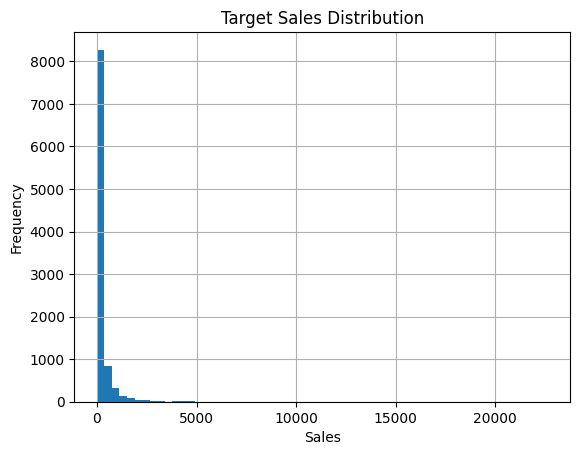

In [18]:
sales_df["Sales"].hist(bins=60)
plt.title("Target Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

#### **1.2.2 Categorical Features**

In [53]:
top_5_cities = sales_df.columns
print(top_5_cities)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


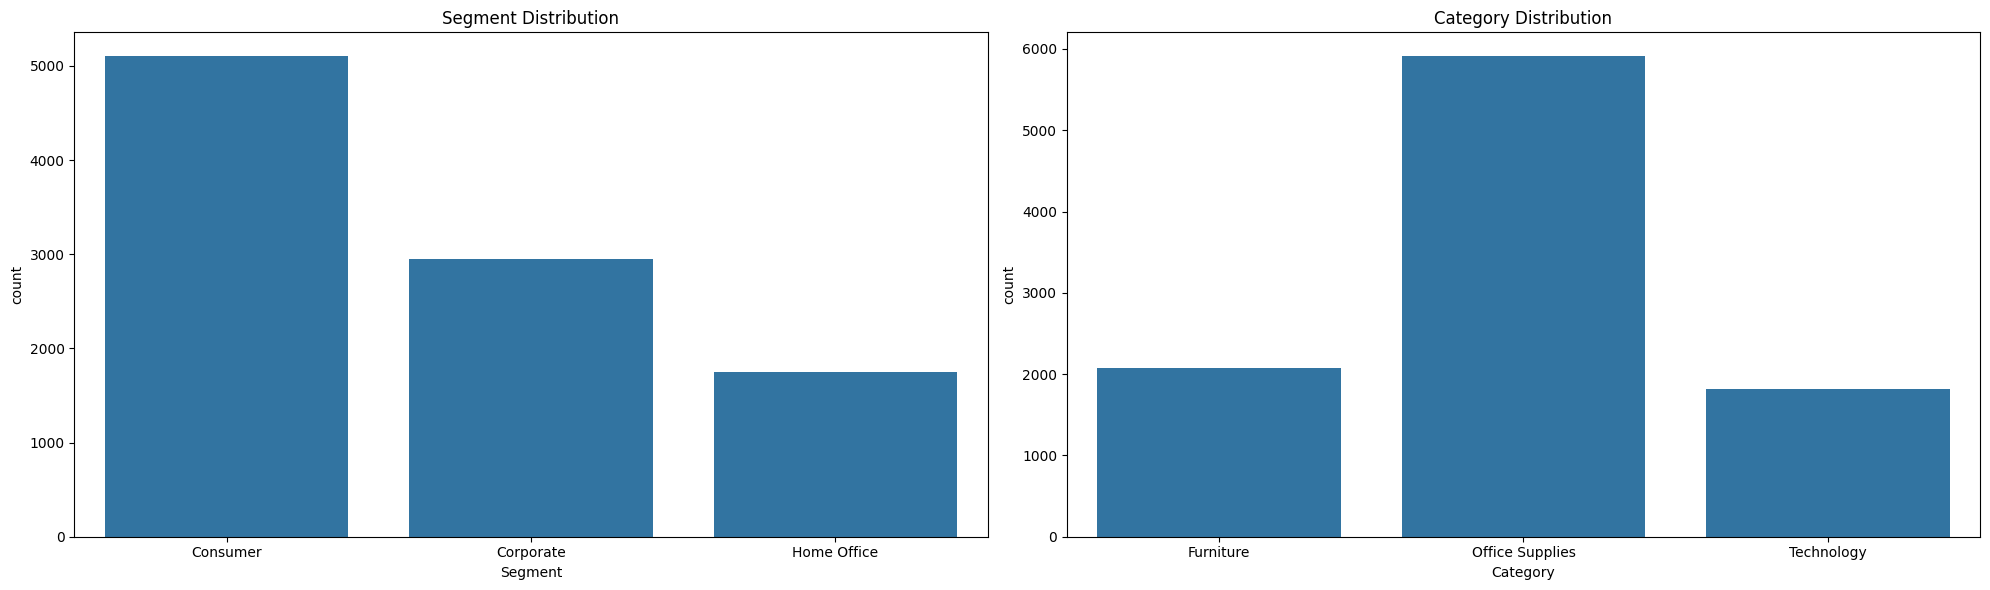

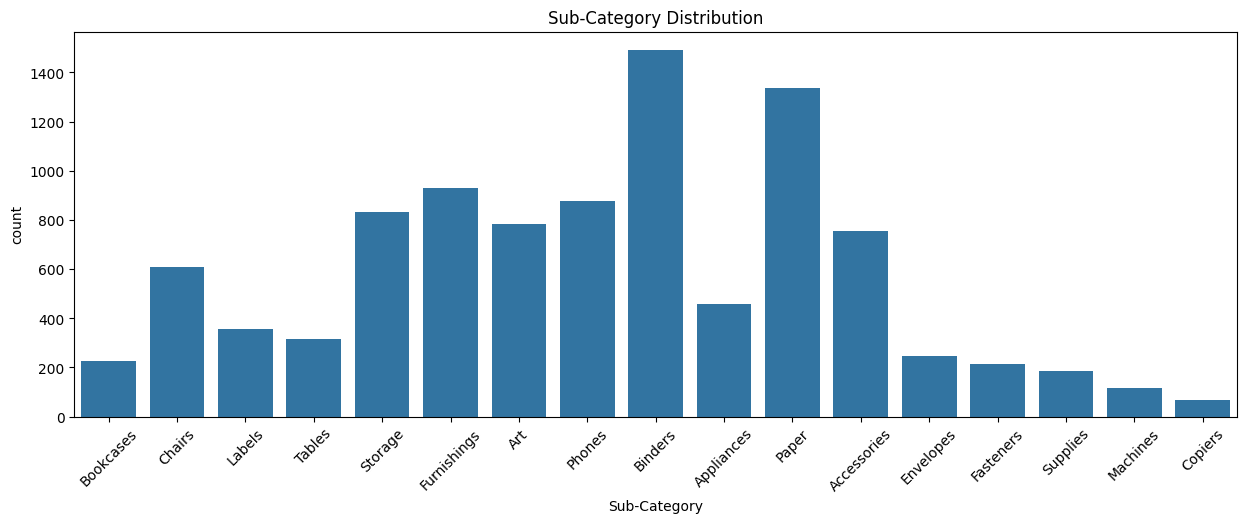

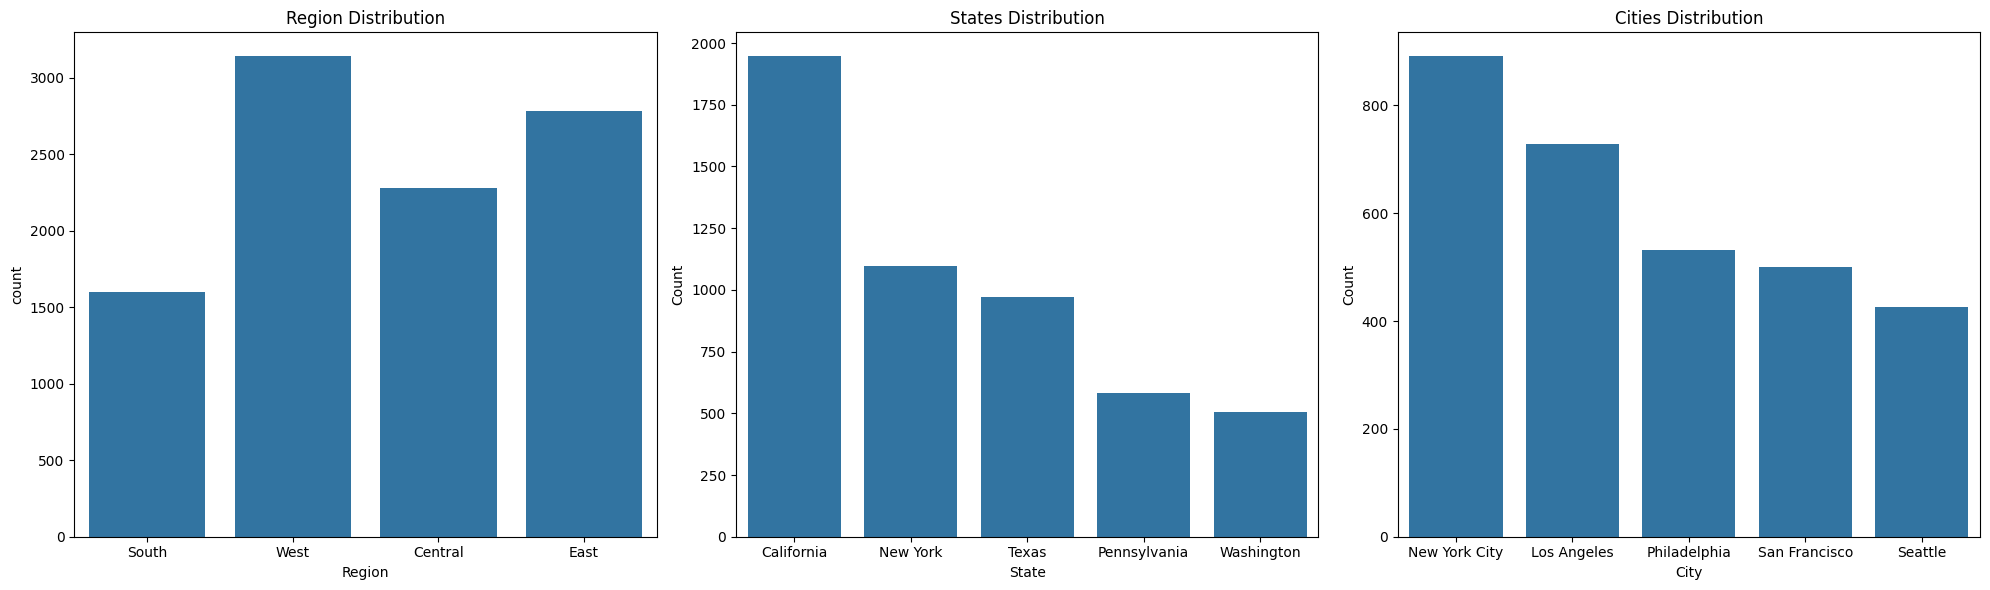

In [ ]:
# Plotting categorical data using bar plots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.countplot(ax=axes[0], x='Segment', data=sales_df)
axes[0].set_title('Segment Distribution')

sns.countplot(ax=axes[1], x='Category', data=sales_df)
axes[1].set_title('Category Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
sns.countplot(x='Sub-Category', data=sales_df)
plt.title('Sub-Category Distribution')
plt.xticks(rotation=45)
plt.show()

fig2, axes2 = plt.subplots(1, 3, figsize=(20, 6))

sns.countplot(ax=axes2[0], x='Region', data=sales_df)
axes2[0].set_title('Region Distribution')

# Create a DataFrame with the top 5 states by count
top_states = sales_df['State'].value_counts().head(5).reset_index()
top_states.columns = ['State', 'Count']

# Plot the data
sns.barplot(ax=axes2[1], x='State', y='Count', data=top_states)
axes2[1].set_title('States Distribution')

# Create a DataFrame with the top 5 cities by count
top_cities = sales_df['City'].value_counts().head(5).reset_index()
top_cities.columns = ['City', 'Count']

# Plot the data
sns.barplot(ax=axes2[2], x='City', y='Count', data=top_cities)
axes2[2].set_title('Cities Distribution')
plt.tight_layout()
plt.show()



### **1.3 Key Finidings**

#### Feature Relevance

1.Time-Based Features:

- `Order Date` and `Ship Date` can be used to create time-based features like:
     Day of the week, month, quarter, or year.

- Time between order and shipment (lead time).

2.Customer and Product Insights:

- `Customer ID`,` Segment`, and `Region` can help analyze customer behavior and preferences.

- `Category` and `Sub-Category` can help identify which products drive sales.

3.External Factors:

- `Ship Mode` can act as a proxy for shipping costs or delivery speed, which might influence sales.

- `Region` and `City` can help analyze geographical trends.

4.Target Variable:

- `Sales` is the value you’ll predict using your forecasting model.

#### To be Cleaned

**1- Columns Manipulation:**
- `Row ID`, `Order ID`, `Customer ID` & `Postal Code` are identfiers that wont contribute to our analysis. so they shoud be removed

**2- Duplicates:**
- check dups after the column manipulation as of what was observed at the general feel of 1861 id assigned to 1849 name

**3- Outliers:**
- the data contain outliers so consider conducting an Outlier Analysis and identfiy the method of handling(i recommend Scaling)

**4- New Features:**
1. **Time-Based Features (from `Order Date`)**

The `Order Date` column will be used to create features that capture trends, seasonality, and patterns in the sales data. Here’s what we’ll create:

**Date Components**
- **Year**: Extract the year from the order date.
- **Month**: Extract the month from the order date.
- **Day**: Extract the day of the month from the order date.
- **Day of Week**: Extract the day of the week (e.g., Monday = 0, Sunday = 6).
- **Week of Year**: Extract the week number of the year.
- **Quarter**: Extract the quarter of the year (e.g., Q1, Q2, Q3, Q4).

**Seasonal Features**
- **Season**: Assign seasons based on the month:
  - Winter: December, January, February
  - Spring: March, April, May
  - Summer: June, July, August
  - Fall: September, October, November
- **Holiday Flags**: Create binary flags (0 or 1) for major holidays (e.g., Christmas, Black Friday).

**Lag Features**
- **Sales from Previous Month**: Create a feature that captures the sales value from the previous month.
- **Rolling Averages**: Create features like the 3-month or 6-month rolling average of sales.

**Time Since Last Purchase**
- Calculate the time difference between consecutive orders for each customer.


2. **Categorical Variable Encoding**

Categorical variables like `Ship Mode`, `Category`, and `Region` need to be converted into numerical formats for the model to process them. Here’s how we’ll handle them:

**Label Encoding**
- Assign a unique integer to each category.
- Example: `Standard Class` = 0, `Second Class` = 1, etc.
- Use this for ordinal variables (where categories have a natural order).

**One-Hot Encoding**
- Create binary columns for each category.
- Example: `Ship Mode_Standard Class`, `Ship Mode_Second Class`, etc.
- Use this for nominal variables (where categories have no natural order).

**Target Encoding**
- Replace each category with the mean of the target variable (`Sales`).
- Example: Replace `Standard Class` with the average sales for orders with `Standard Class` shipping.
- Useful for high-cardinality categorical variables.

**Frequency Encoding**
- Replace each category with its frequency in the dataset.
- Example: If `Standard Class` appears 1000 times, replace it with 1000.



## **2. Data Cleaning**

## **3. Feature Engineering**

# 📊 Exploratory Data Analysis (EDA) on SuperStore Sales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("SuperStoreSales.csv")

## 1️⃣ What are the number of unique orders and customers?
This section explores the distinct counts of orders and customers in the dataset.

C:\Users\Mana3\AppData\Local\Temp\ipykernel_5464\4291362087.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=["Unique Orders", "Unique Customers"], y=[unique_orders, unique_customers], palette="viridis")


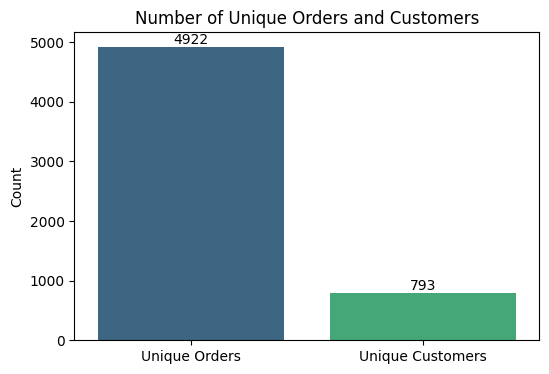

In [3]:
def plot_unique_counts(df):
    unique_orders = df["Order ID"].nunique()
    unique_customers = df["Customer ID"].nunique()

    plt.figure(figsize=(6, 4))
    ax = sns.barplot(x=["Unique Orders", "Unique Customers"], y=[unique_orders, unique_customers], palette="viridis")
    plt.title("Number of Unique Orders and Customers")
    plt.ylabel("Count")

    # Annotate the bars with their exact values
    for i, value in enumerate([unique_orders, unique_customers]):
        ax.text(i, value + 0.00000005 * value, f'{value}', ha='center', va='bottom')

    plt.show()

plot_unique_counts(df)

## 2️⃣ How is the distribution of shipping modes?
Analyzing the different shipping modes used in the dataset.

C:\Users\Mana3\AppData\Local\Temp\ipykernel_5464\1931415966.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df["Ship Mode"], order=df["Ship Mode"].value_counts().index, palette="coolwarm")


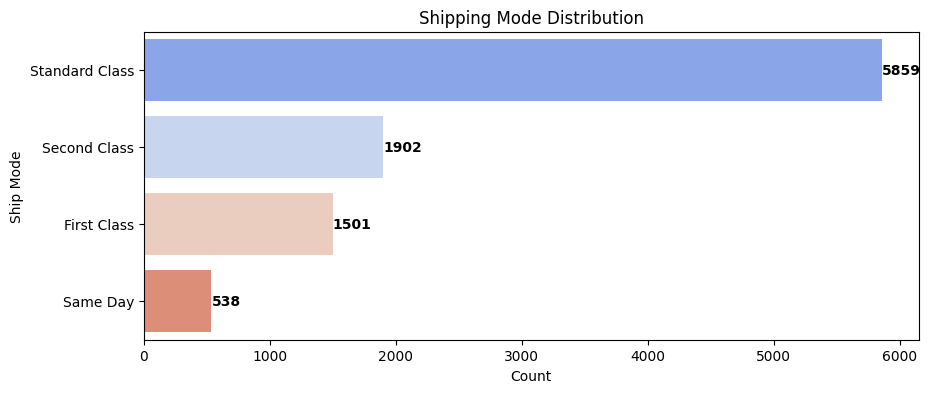

In [4]:
def plot_shipping_modes(df):
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(y=df["Ship Mode"], order=df["Ship Mode"].value_counts().index, palette="coolwarm")
    plt.title("Shipping Mode Distribution")
    plt.xlabel("Count")
    plt.ylabel("Ship Mode")
    
    # Labeling the counts on the bars with adjusted position after the column
    for p in ax.patches:
        ax.text(p.get_width() + 0.5, p.get_y() + p.get_height() / 2,  # Increase the 0.5 value for more spacing
                f'{int(p.get_width())}', ha='left', va='center', color='black', fontweight='bold')
    
    plt.show()

plot_shipping_modes(df)


## 3️⃣ What are the most and least common categories & sub-categories?
Identifying the most and least frequently occurring product categories and sub-categories.

C:\Users\Mana3\AppData\Local\Temp\ipykernel_5464\3772950156.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(y=df["Category"], order=df["Category"].value_counts().index, palette="magma")


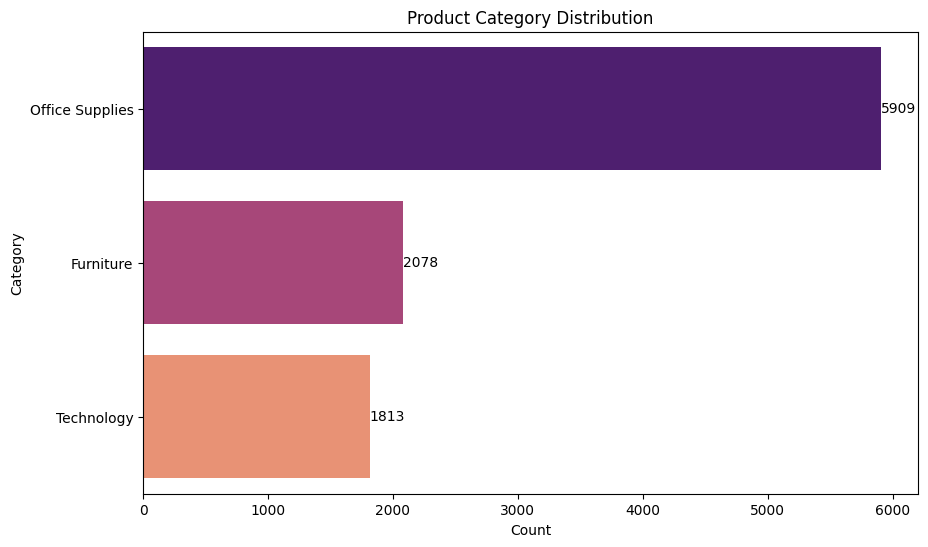

C:\Users\Mana3\AppData\Local\Temp\ipykernel_5464\3772950156.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(y=df["Sub-Category"], order=df["Sub-Category"].value_counts().index, palette="coolwarm")


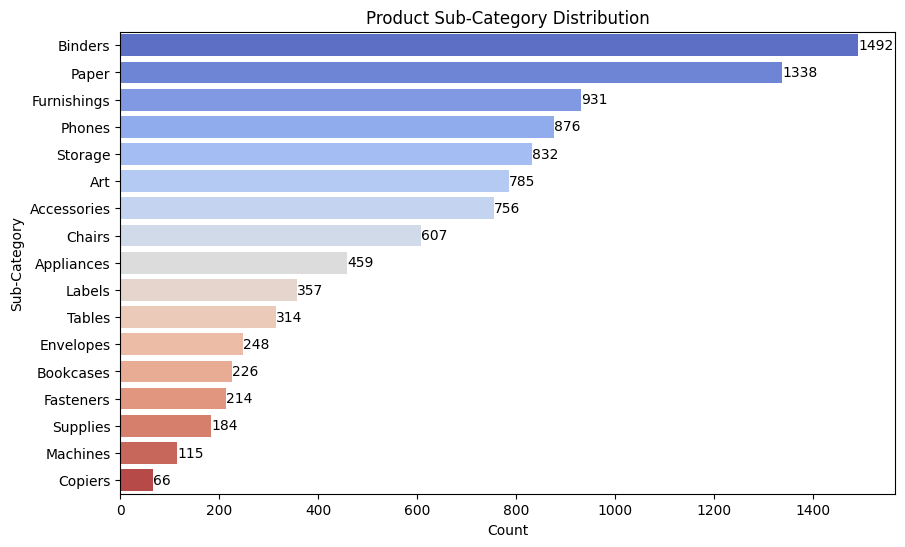

In [5]:

def plot_category_distribution(df):
    # Plot for Category distribution
    plt.figure(figsize=(10, 6))
    ax1 = sns.countplot(y=df["Category"], order=df["Category"].value_counts().index, palette="magma")
    plt.title("Product Category Distribution")
    plt.xlabel("Count")
    plt.ylabel("Category")

    # Annotate the bars with their exact values for Category
    for p in ax1.patches:
        width = p.get_width()
        ax1.text(width + 0.2, p.get_y() + p.get_height() / 2, f'{int(width)}', va='center')

    plt.show()

    # Plot for Sub-Category distribution
    plt.figure(figsize=(10, 6))
    ax2 = sns.countplot(y=df["Sub-Category"], order=df["Sub-Category"].value_counts().index, palette="coolwarm")
    plt.title("Product Sub-Category Distribution")
    plt.xlabel("Count")
    plt.ylabel("Sub-Category")

    # Annotate the bars with their exact values for Sub-Category
    for p in ax2.patches:
        width = p.get_width()
        ax2.text(width + 0.11, p.get_y() + p.get_height() / 2, f'{int(width)}', va='center')

    plt.show()

plot_category_distribution(df)

## 4️⃣ Which categories generate the highest and lowest total sales?
Comparing product categories based on total revenue to determine top and bottom performers.

C:\Users\Mana3\AppData\Local\Temp\ipykernel_5464\3891496263.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=category_sales.index, x=category_sales.values, palette="Blues_r")


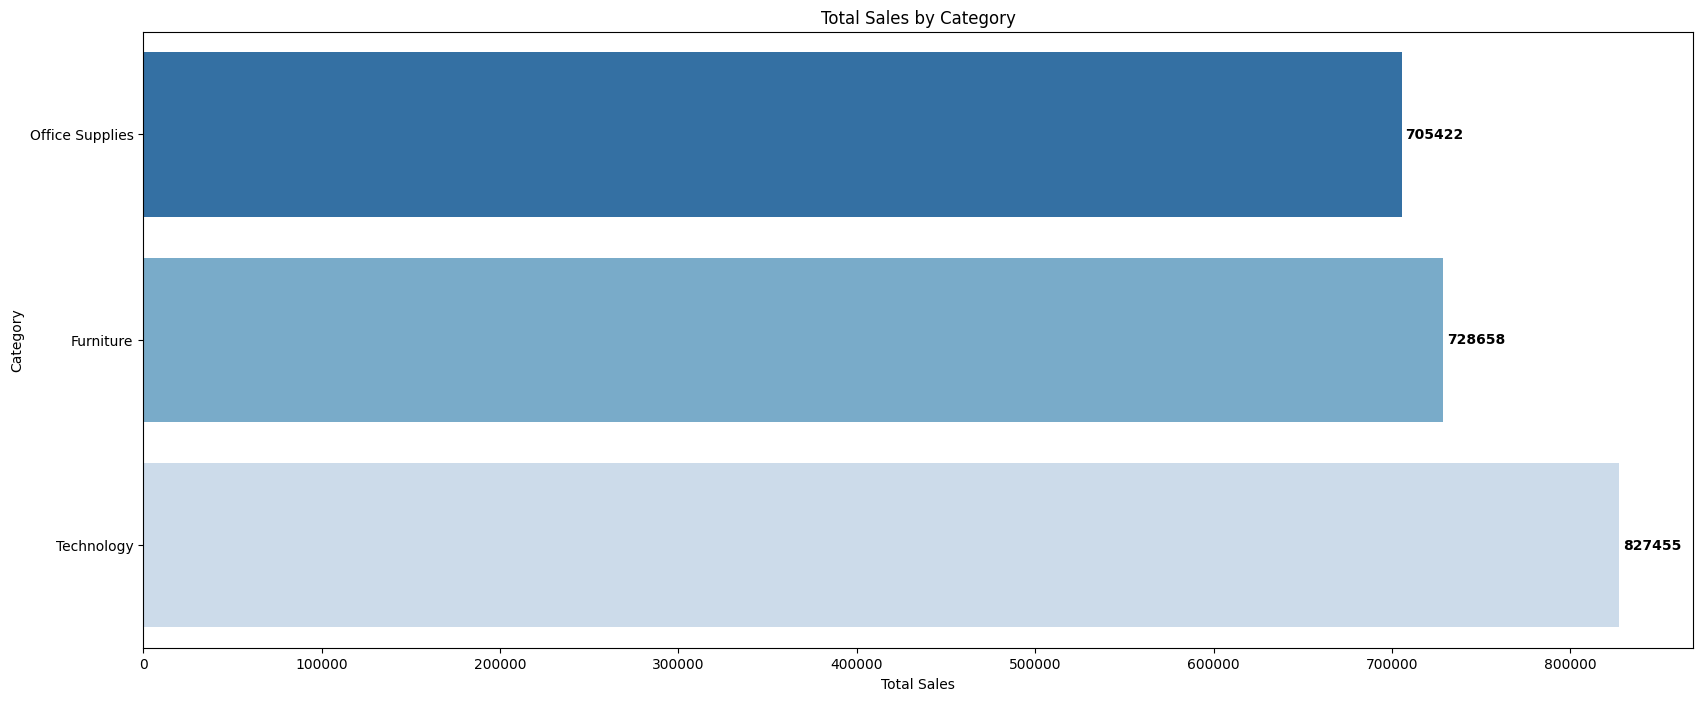

In [6]:
def plot_category_sales(df):
    category_sales = df.groupby("Category")["Sales"].sum().sort_values()

    plt.figure(figsize=(20, 8))
    ax = sns.barplot(y=category_sales.index, x=category_sales.values, palette="Blues_r")
    plt.title("Total Sales by Category")
    plt.xlabel("Total Sales")
    plt.ylabel("Category")
    
    # Adding labels to the bars
    for p in ax.patches:
        ax.text(p.get_width() + 2000, p.get_y() + p.get_height() / 2,  # Adjust label position
                f'{int(p.get_width())}', ha='left', va='center', color='black', fontweight='bold')
    
    plt.show()

plot_category_sales(df)

## 5️⃣ What are the Top 10 Products by Average Sales?
Identifying the highest-selling products and those that contribute the least to profitability.

C:\Users\Mana3\AppData\Local\Temp\ipykernel_5464\1034503644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=product_sales.index, x=product_sales.values, palette="Greens_r")


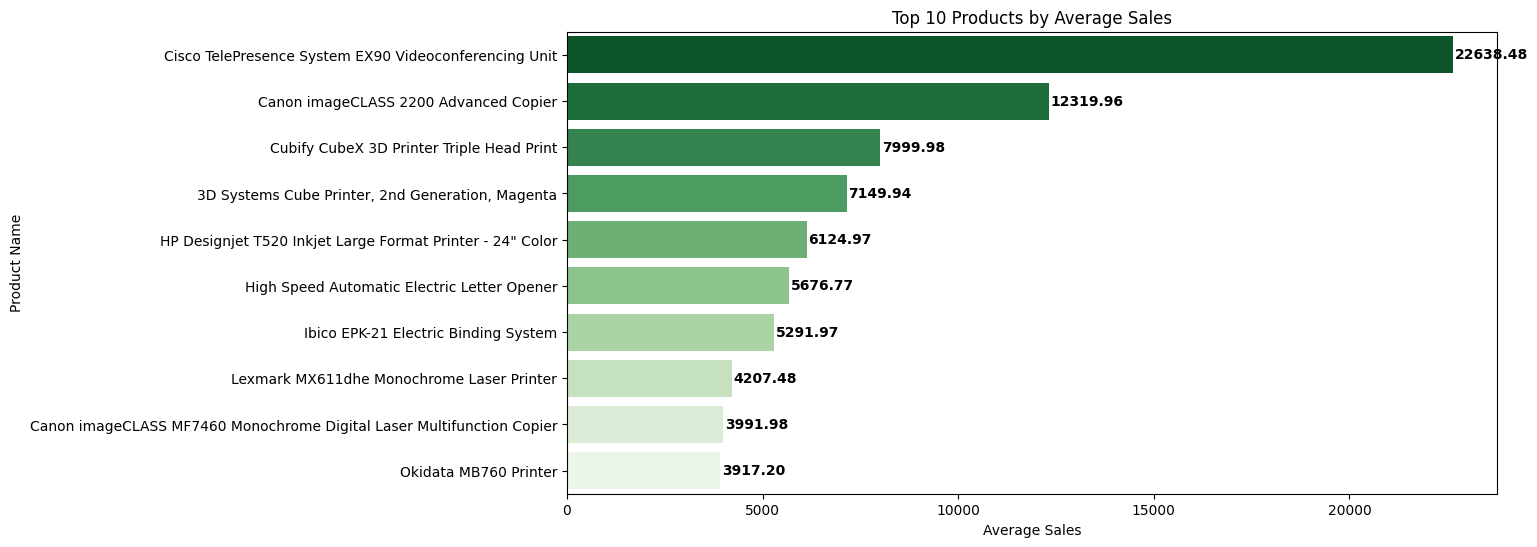

In [7]:
def plot_product_performance(df):
    product_sales = df.groupby("Product Name")["Sales"].mean().sort_values(ascending=False).head(10)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(y=product_sales.index, x=product_sales.values, palette="Greens_r")
    plt.title("Top 10 Products by Average Sales")
    plt.xlabel("Average Sales")
    plt.ylabel("Product Name")
    
    # Adding labels to the bars
    for p in ax.patches:
        ax.text(p.get_width() + 50, p.get_y() + p.get_height() / 2,  # Adjust label position
                f'{p.get_width():.2f}', ha='left', va='center', color='black', fontweight='bold')
    
    plt.show()

plot_product_performance(df)


## 6️⃣ Who are the top customers contributing the most to total sales?
Examining the highest-spending customers and their impact on overall revenue.

C:\Users\Mana3\AppData\Local\Temp\ipykernel_5464\3052080383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_customers.index, x=top_customers.values, palette="Oranges_r")


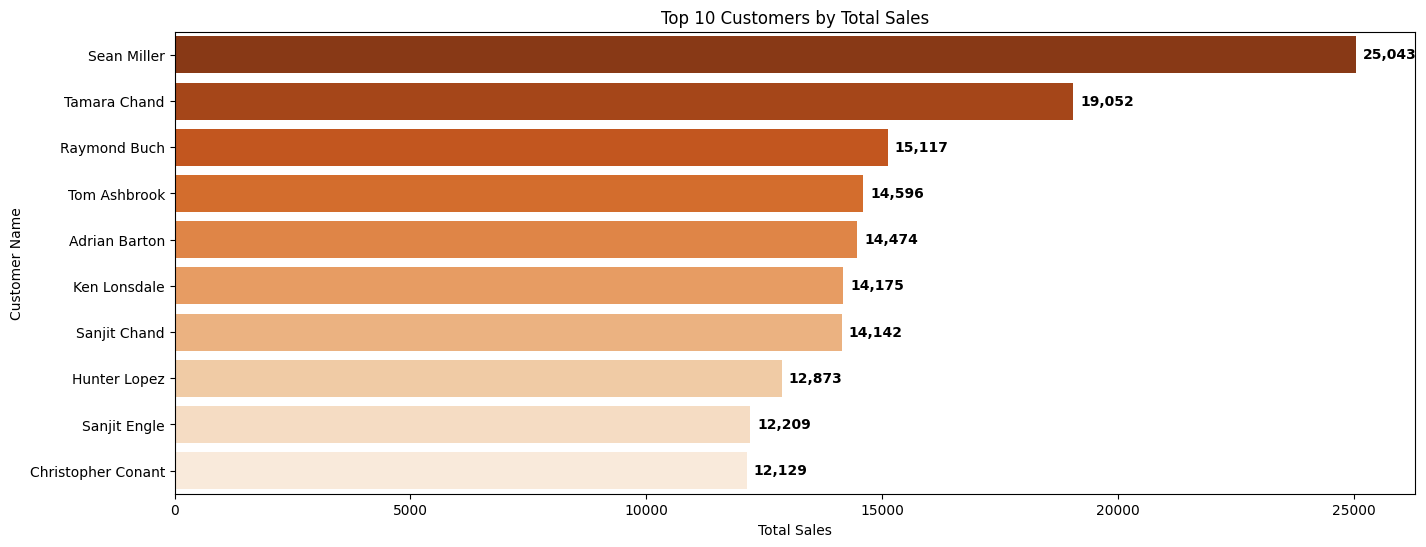

In [8]:
def plot_top_customers(df):
    top_customers = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(16, 6))
    ax = sns.barplot(y=top_customers.index, x=top_customers.values, palette="Oranges_r")
    plt.title("Top 10 Customers by Total Sales")
    plt.xlabel("Total Sales")
    plt.ylabel("Customer Name")
    
    # Adding labels to the bars
    for p in ax.patches:
        ax.text(p.get_width() + 150, p.get_y() + p.get_height() / 2,  # Adjust label position
                f'{p.get_width():,.0f}', ha='left', va='center', color='black', fontweight='bold')
    
    plt.show()

plot_top_customers(df)

## 7️⃣ How does the average order value vary across customer segments?
Exploring how different customer segments influence the average order value.

C:\Users\Mana3\AppData\Local\Temp\ipykernel_5464\1337184727.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=avg_sales_segment.index, x=avg_sales_segment.values, palette="coolwarm")


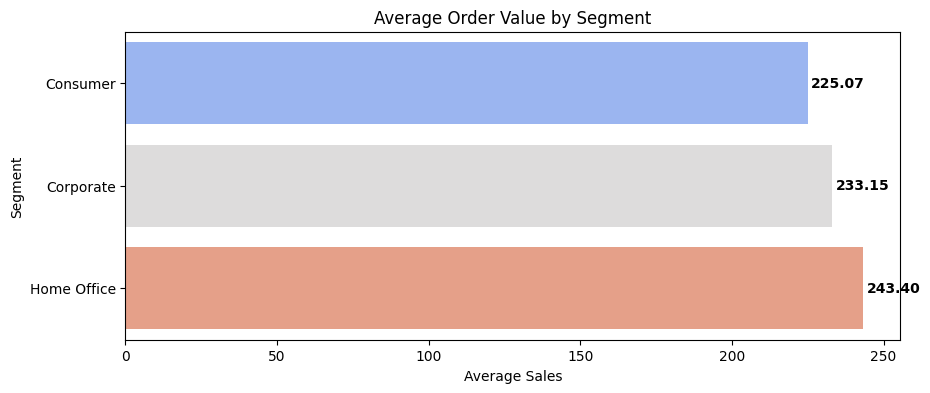

In [9]:
def plot_segment_avg_order(df):
    avg_sales_segment = df.groupby("Segment")["Sales"].mean()

    plt.figure(figsize=(10, 4))
    ax = sns.barplot(y=avg_sales_segment.index, x=avg_sales_segment.values, palette="coolwarm")
    plt.title("Average Order Value by Segment")
    plt.xlabel("Average Sales")
    plt.ylabel("Segment")
    
    # Adding labels to the bars
    for p in ax.patches:
        ax.text(p.get_width() + 1, p.get_y() + p.get_height() / 2,  # Adjust label position
                f'{p.get_width():,.2f}', ha='left', va='center', color='black', fontweight='bold')
    
    plt.show()

plot_segment_avg_order(df)


## 8️⃣ Which states and cities are the most profitable?
Investigating regional trends to determine the most and least profitable locations.

C:\Users\Mana3\AppData\Local\Temp\ipykernel_5464\1378577223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=state_sales.index, x=state_sales.values, palette="Blues")


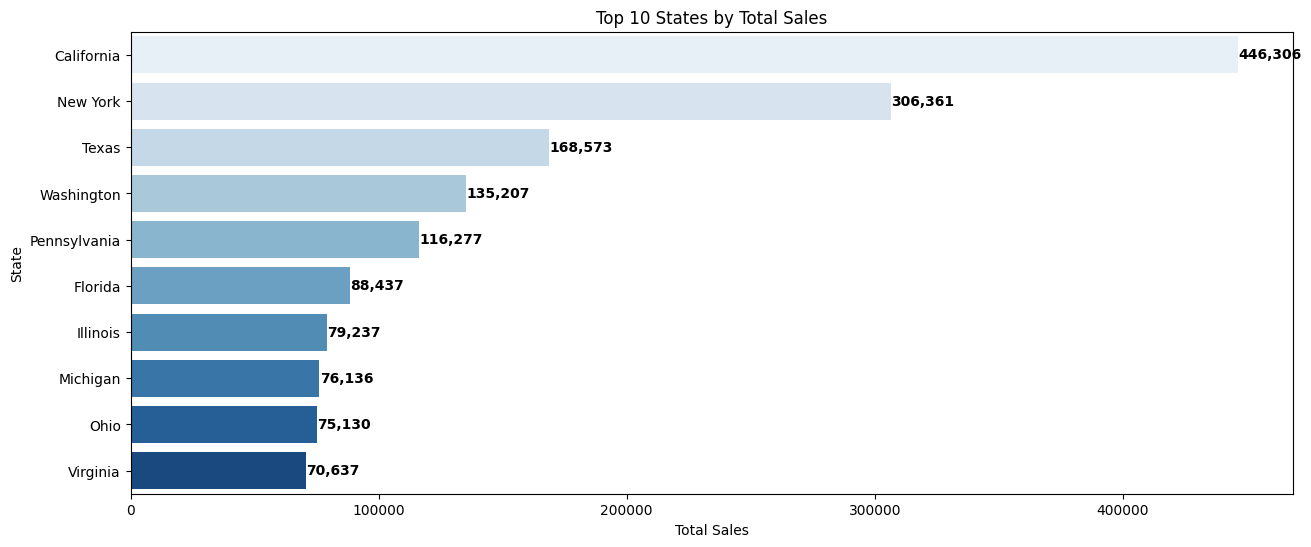

In [10]:
def plot_sales_by_location(df):
    state_sales = df.groupby("State")["Sales"].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(15, 6))
    ax = sns.barplot(y=state_sales.index, x=state_sales.values, palette="Blues")
    plt.title("Top 10 States by Total Sales")
    plt.xlabel("Total Sales")
    plt.ylabel("State")
    
    # Adding labels to the bars
    for p in ax.patches:
        ax.text(p.get_width() + 200, p.get_y() + p.get_height() / 2,  # Adjust label position
                f'{p.get_width():,.0f}', ha='left', va='center', color='black', fontweight='bold')
    
    plt.show()

plot_sales_by_location(df)

## 9️⃣ What are the sales trends over time?
Analyzing sales trends over different time periods.

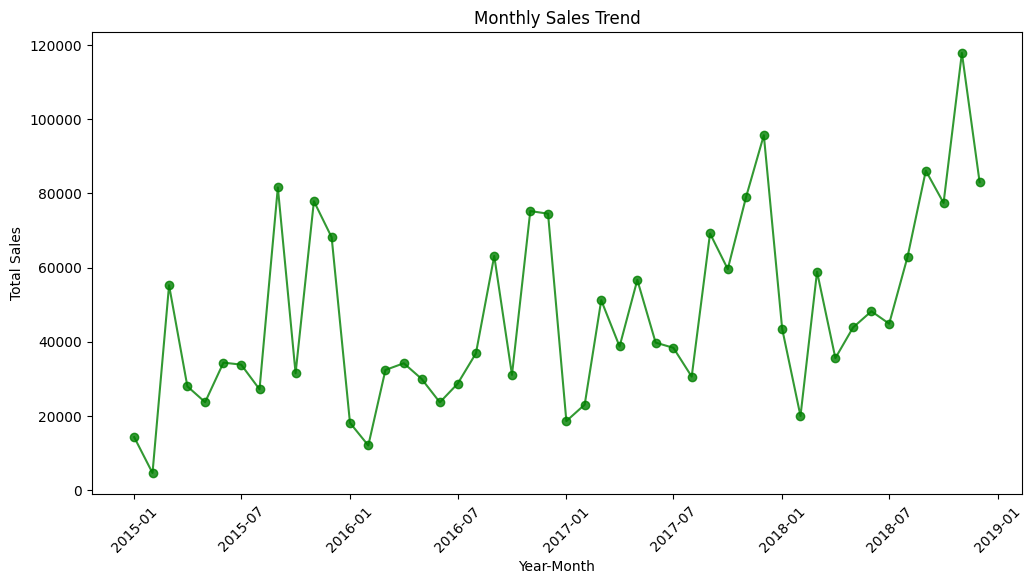

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Extract year and month for monthly trend analysis
df['Year-Month'] = df['Order Date'].dt.to_period('M')

# Aggregate sales by month
df_monthly_sales = df.groupby('Year-Month')['Sales'].sum().reset_index()

# Convert 'Year-Month' back to datetime for plotting
df_monthly_sales['Year-Month'] = df_monthly_sales['Year-Month'].astype(str)
df_monthly_sales['Year-Month'] = pd.to_datetime(df_monthly_sales['Year-Month'])

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_sales['Year-Month'], df_monthly_sales['Sales'], marker='o', linestyle='-', color='green', alpha=0.8)
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()


## 🔟 What are the yearly sales trends?
Examining the sales trends on a yearly basis.

C:\Users\Mana3\AppData\Local\Temp\ipykernel_5464\4204805765.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_yearly_sales['Year'].astype(str), y=df_yearly_sales['Sales'], palette='viridis')


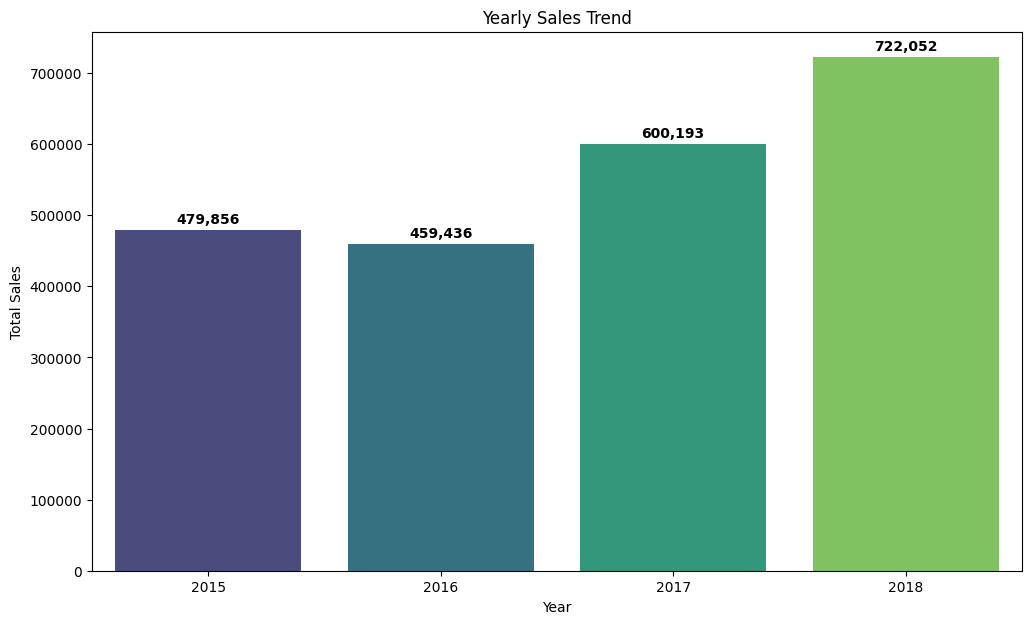

In [12]:

# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Drop NaN values in 'Order Date' if any
df = df.dropna(subset=['Order Date'])

# Extract Year
df['Year'] = df['Order Date'].dt.year

# Group by Year and Sum Sales
df_yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=df_yearly_sales['Year'].astype(str), y=df_yearly_sales['Sales'], palette='viridis')
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Yearly Sales Trend")

# Adding labels to bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 5000,  
            f'{p.get_height():,.0f}', ha='center', va='bottom', 
            color='black', fontweight='bold')

plt.show()


## 1️⃣1️⃣ What are the sales trends by day of the week?
Analyzing sales trends across different days of the week.

C:\Users\Mana3\AppData\Local\Temp\ipykernel_5464\265848116.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_day_sales['Day of Week'], y=df_day_sales['Sales'], palette='coolwarm')


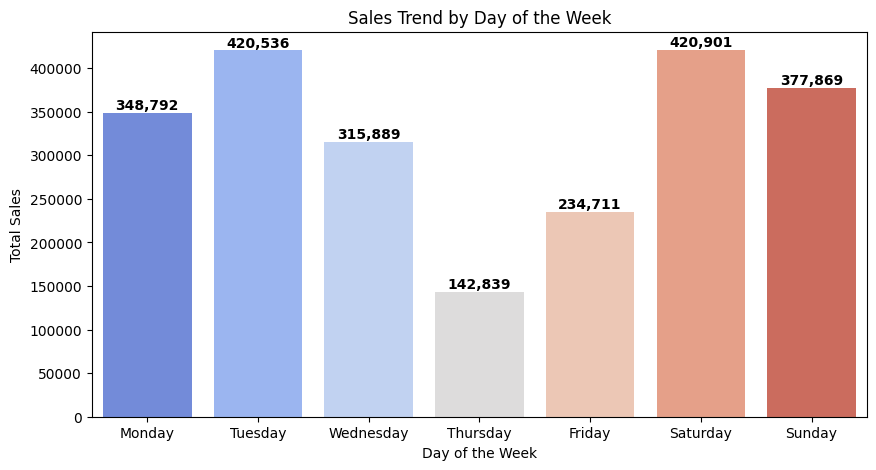

In [13]:
df['Day of Week'] = df['Order Date'].dt.day_name()
df_day_sales = df.groupby('Day of Week')['Sales'].sum().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]).reset_index()

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df_day_sales['Day of Week'], y=df_day_sales['Sales'], palette='coolwarm')

plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.title("Sales Trend by Day of the Week")

# Adding labels on bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 500,  # Adjust label position
            f'{p.get_height():,.0f}', ha='center', va='bottom', color='black', fontweight='bold')

plt.show()



## 1️⃣2️⃣ What are the monthly sales trends?
Analyzing sales trends across different months.

C:\Users\Mana3\AppData\Local\Temp\ipykernel_5464\149795607.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_month_sales['Month'], y=df_month_sales['Sales'], palette='magma')


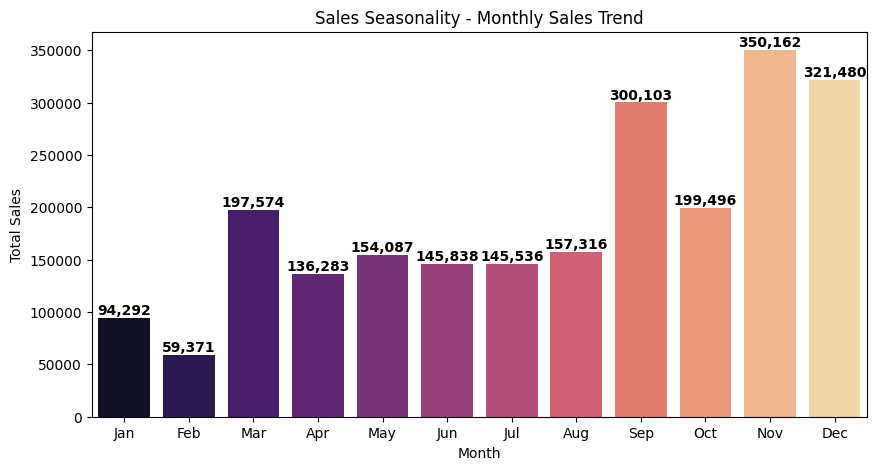

In [14]:


# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract Month
df['Month'] = df['Order Date'].dt.month

# Group by Month and Sum Sales
df_month_sales = df.groupby('Month')['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df_month_sales['Month'], y=df_month_sales['Sales'], palette='magma')

# Customizing labels
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Sales Seasonality - Monthly Sales Trend")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adding count labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 500,  # Adjust position slightly above the bar
            f'{p.get_height():,.0f}', ha='center', va='bottom', 
            color='black', fontweight='bold')

plt.show()


## 1️⃣3️⃣ What is the sales heatmap by day and month?
Visualizing sales data in a heatmap format by day and month.

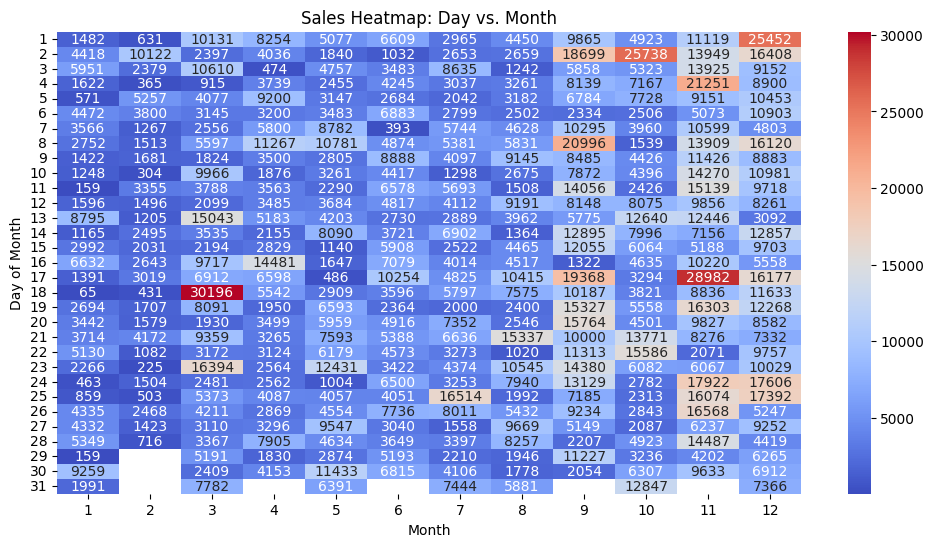

In [15]:
df['Day'] = df['Order Date'].dt.day
heatmap_data = df.pivot_table(values='Sales', index='Day', columns='Month', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f")
plt.xlabel("Month")
plt.ylabel("Day of Month")
plt.title("Sales Heatmap: Day vs. Month")
plt.show()


## 1️⃣4️⃣ What are the yearly sales trends by category?
Analyzing sales trends for each category over the years.

Top-Selling Category Each Year:
    Year    Category        Sales
2   2015  Technology  173865.5070
3   2016   Furniture  164053.8674
8   2017  Technology  221961.9440
11  2018  Technology  269370.6910


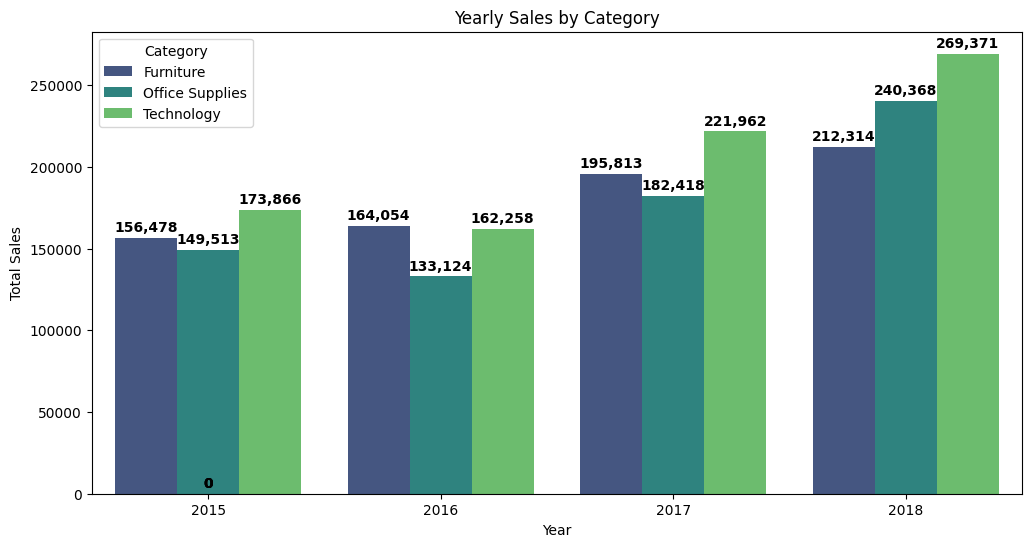

In [16]:


# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract year from Order Date
df['Year'] = df['Order Date'].dt.year

# Aggregate sales by Year and Category
df_category_sales = df.groupby(['Year', 'Category'])['Sales'].sum().reset_index()

# Identify the top-selling category each year
top_category_per_year = df_category_sales.loc[df_category_sales.groupby('Year')['Sales'].idxmax()]

# Display results
print("Top-Selling Category Each Year:")
print(top_category_per_year)

# Plot sales trends for each category over the years
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Year', y='Sales', hue='Category', data=df_category_sales, palette='viridis')

plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Yearly Sales by Category")
plt.legend(title="Category")

# Add labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 2000,  # Adjust position
            f'{p.get_height():,.0f}', ha='center', va='bottom', color='black', fontweight='bold')

plt.show()


## 1️⃣5️⃣ What is the sales distribution by segment over the years?
Analyzing the sales distribution by segment for each year.


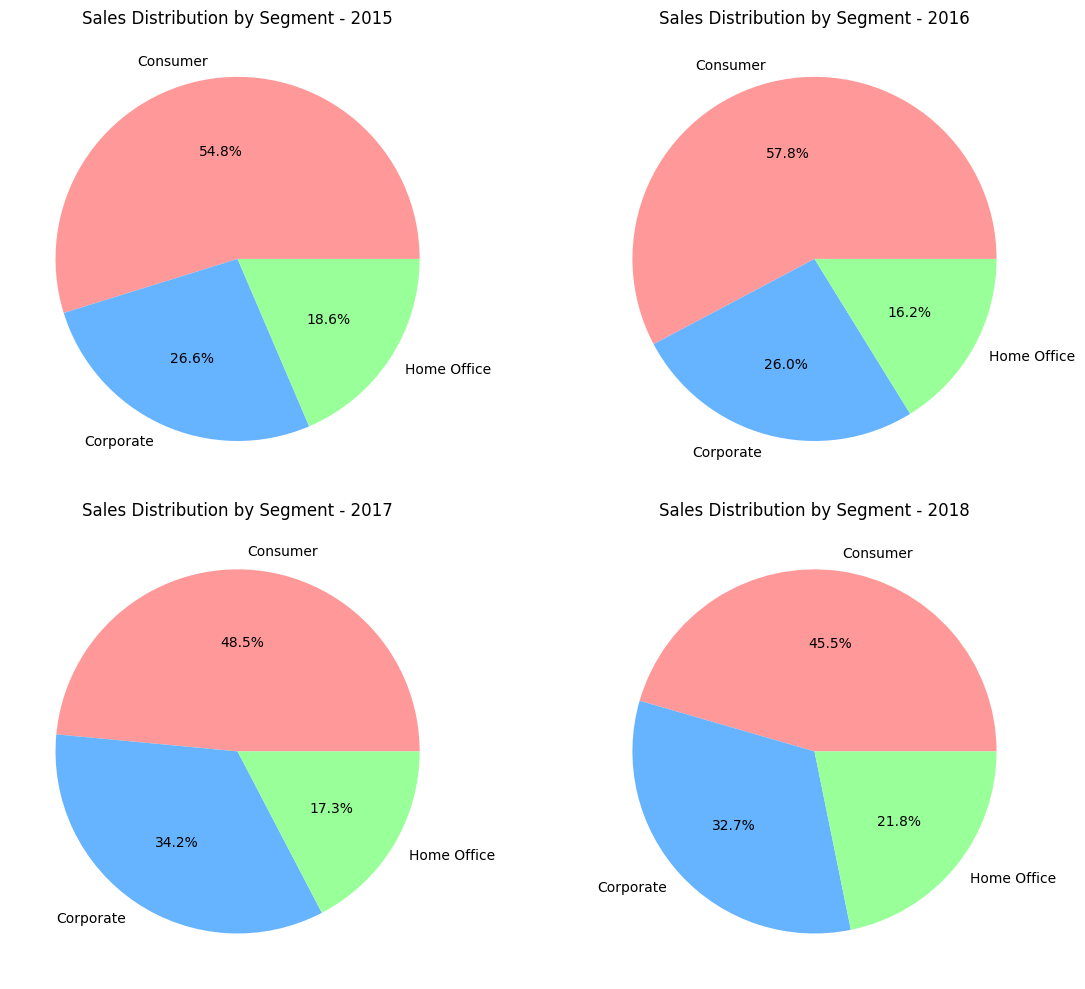

In [17]:


# Extract Year from Order Date
df['Year'] = df['Order Date'].dt.year

# Get unique years sorted
years = sorted(df['Year'].unique())

# Create subplots: Two pie charts per row
rows = (len(years) + 1) // 2  # Define the number of rows needed
fig, axes = plt.subplots(rows, 2, figsize=(12, rows * 5))

# Flatten axes for easier iteration (handles odd numbers of years)
axes = axes.flatten()

# Loop through each year and create a pie chart
for i, year in enumerate(years):
    df_year = df[df['Year'] == year].groupby('Segment')['Sales'].sum()
    
    axes[i].pie(df_year, labels=df_year.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
    axes[i].set_title(f"Sales Distribution by Segment - {year}")

# Hide any extra subplots if odd number of years
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


## **Summary**